In [12]:
from matplotlib.offsetbox import AnchoredText
import cartopy.crs as ccrs
import cartopy
from datetime import date, timedelta, datetime 
import netCDF4
import scipy.stats as st
import matplotlib as mpl
import matplotlib.colors as colors
import netCDF4 as nc4
import numpy as np
import matplotlib.pyplot as plt
import sys
from Tools_jpdf import*
import matplotlib.patches as mpatches

plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 2.50


# TO EDIT 

dir_save = '/home2/datawork/tpicard/M2_intership/RREX2008_FT_3h/JPDF_figures/'
#dir_save = 'figure/'


month = 'feb'
list_month = ['jan','feb', 'mar', 'apr', 'may', 'jun','jul','aug','sep','oct','nov','dec']
#list_month = ['feb']

HF_C = []
PER_C = []
HF_AC = []
PER_AC = []
TOT_NEG_WC = []
TOT_FLU = []

for month in list_month:

    print(month)

    nc = nc4.Dataset('/home2/datawork/tpicard/M2_intership/RREX2008_FT_3h/JPDF_filtred_domain/JPDF_{0}_mld.nc'.format(month),'r')
    H_wc = np.asfortranarray(nc.variables['H_wc'])[:,:,:,:]
    gap_list = np.asfortranarray(nc.variables['gap_list'])[:]

    xedges = np.arange(-6,6.05,0.05)
    yedges = np.arange(0,6.025,0.025)
    xx, yy = np.meshgrid(xedges[1:], yedges[1:])

    per_sf_wc_c = []
    per_sf_wc_ac = []
    
    tot_flu_wc_c= []
    tot_flu_wc_ac= []
    
    tot_neg_wc = []
    
    tot_flu = []
    
    for i in range(gap_list.shape[0]):

        H_wc_sum = np.nansum(H_wc[:,:,i,:],axis=2)

        H_wc_neg = np.where(H_wc_sum<0,H_wc_sum,0) # Flux de subduction
        
        H_f_wc_c = np.where(xx > 0.5, H_wc_sum,0)
        H_f_wc_c = np.where(yy > xx, H_f_wc_c,0)

        H_f_wc_ac = np.where(xx < -0.5, H_wc_sum,0)
        H_f_wc_ac = np.where(yy > -xx, H_f_wc_ac,0)

        H_f_wc_per_c = np.sum(H_f_wc_c)*100/np.sum(H_wc_neg)
        H_f_wc_per_ac = np.sum(H_f_wc_ac)*100/np.sum(H_wc_neg)

        per_sf_wc_c.append(H_f_wc_per_c)
        per_sf_wc_ac.append(H_f_wc_per_ac)
        
        tot_flu_wc_c.append(np.nansum(H_f_wc_c))
        tot_flu_wc_ac.append(np.nansum(H_f_wc_ac))
        
        tot_neg_wc.append(np.sum(H_wc_neg))
        
        tot_flu.append(np.nansum(H_wc_sum))
        
        
    HF_C.append(tot_flu_wc_c)
    HF_AC.append(tot_flu_wc_ac)    
    PER_C.append(per_sf_wc_c)   
    PER_AC.append(per_sf_wc_ac)
    TOT_NEG_WC.append(tot_neg_wc)
    TOT_FLU.append(tot_flu)

jan
feb
mar
apr
may
jun
jul
aug
sep
oct
nov
dec


In [13]:
H_f_c_list=[]
H_f_ac_list=[]
H_f_tot_list =[]

xedges = np.arange(-6,6.05,0.05)
yedges = np.arange(0,6.025,0.025)
xx, yy = np.meshgrid(xedges[1:], yedges[1:])

for i in range(0,len(list_month)):
        
    month=list_month[i]
    
    nc = nc4.Dataset('/home2/datawork/tpicard/M2_intership/RREX2008_FT_3h/JPDF_filtred_domain/JPDF_{0}_mld.nc'.format(month),'r')
    H = np.asfortranarray(nc.variables['H_jpdf'])[:,:,:,:]
    #H_wc = np.asfortranarray(nc.variables['H_wc'])[:,:,:,:]
    gap_list = np.asfortranarray(nc.variables['gap_list'])[:]
    nc.close()
    
    H_sum = np.nansum(H[:,:,0,:],axis=2)
    H_sum_norm = H_sum/np.sum(H_sum)
    H_f = np.where(xx > 0.5, H_sum,0)
    H_f = np.where(yy > xx, H_f,0)
    H_f_ac = np.where(xx < -0.5, H_sum,0)
    H_f_ac = np.where(yy > -xx, H_f_ac,0)
    H_f_c_list.append(np.round(np.nansum(H_f)*100/np.nansum(H_sum),decimals=1))
    H_f_ac_list.append(np.round(np.nansum(H_f_ac)*100/np.nansum(H_sum),decimals=1))
    H_f_tot_list.append(np.round(np.nansum(H_f_ac+H_f)*100/np.nansum(H_sum),decimals=1))
    print(month)

jan
feb
mar
apr
may
jun
jul
aug
sep
oct
nov
dec


In [17]:
H_c_tot_list = H_f_c_list
H_ac_tot_list = H_f_ac_list

In [18]:
cmap_month = plt.cm.nipy_spectral
colors_month = [cmap_month(i) for i in np.linspace(0., 1., 12)] 

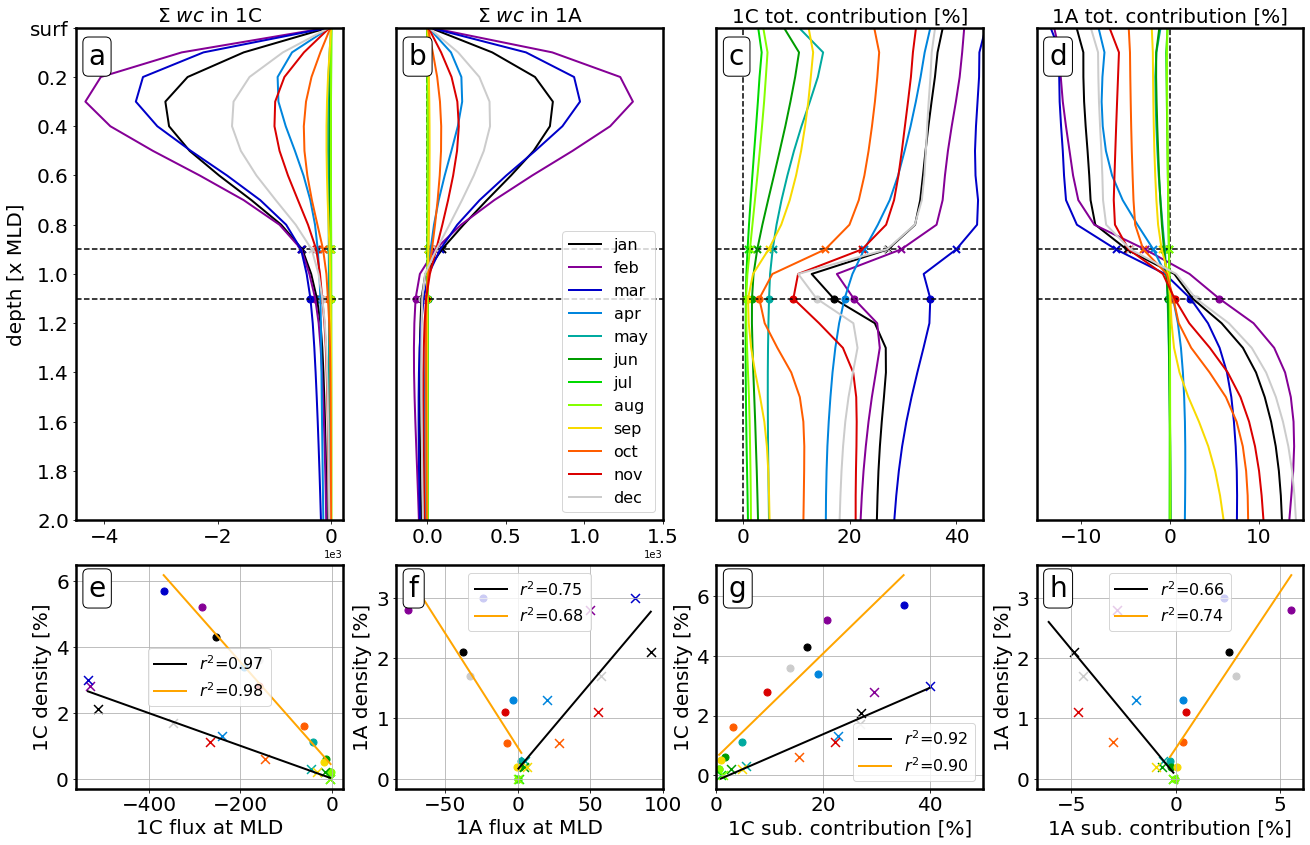

In [19]:
import matplotlib.transforms as mtransforms
from matplotlib.gridspec import GridSpec

index_mld_below = 9
index_mld_above = 11

title_jpdf = []
for gap in gap_list[:-1]:
    title_jpdf.append('{:.2}'.format(1-gap))
    
title_jpdf.append('surf')

fig = plt.figure(figsize=(22,14))

gs = GridSpec(3, 4, figure=fig)
ax2 = fig.add_subplot(gs[:2, 0])
ax1 = fig.add_subplot(gs[:2, 1])
ax4 = fig.add_subplot(gs[:2, 2])
ax3 = fig.add_subplot(gs[:2, 3])
ax8 = fig.add_subplot(gs[2, 0])
ax6 = fig.add_subplot(gs[2, 1])
ax7 = fig.add_subplot(gs[2, 2])
ax5 = fig.add_subplot(gs[2, 3])

label = 'b'
trans = mtransforms.ScaledTranslation(10/72, -5/72, fig.dpi_scale_trans)
ax1.text(0.01, 0.98, label, transform=ax1.transAxes + trans,
        fontsize=28, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='white', alpha=1, pad=0.2))

for i in range(0,len(HF_AC)):
    ax1.plot(HF_AC[i],gap_list,label=list_month[i],linewidth=2,color=colors_month[i])
    
for i in range(0,len(HF_C)):
    ax1.scatter(HF_AC[i][index_mld_below],gap_list[index_mld_below],s=50,color=colors_month[i])

for i in range(0,len(HF_C)):
    ax1.scatter(HF_AC[i][index_mld_above],gap_list[index_mld_above],s=50,color=colors_month[i],edgecolor="k",linewidth=2,marker='x')


ax1.hlines(gap_list[index_mld_below],-500,1500,linestyle='--',color='k')
ax1.hlines(gap_list[index_mld_above],-500,1500,linestyle='--',color='k')
ax1.set_xlim(-200,1500)


#ax1.set_xticks(size=20,rotation=0)
ax1.tick_params(axis='both',labelsize=20)    
ax1.ticklabel_format(style='sci', axis='x',scilimits=(0,0))
ax1.legend(prop={'size': 16})
ax1.vlines(0,gap_list[0],gap_list[-1],linestyles='--',colors='k')
ax1.set_ylim(gap_list[0],gap_list[-1])
ax1.set_title(r'$\Sigma$ $wc$ in 1A',size=20)
ax1.set_yticks([])

label = 'a'
trans = mtransforms.ScaledTranslation(10/72, -5/72, fig.dpi_scale_trans)
ax2.text(0.01, 0.98, label, transform=ax2.transAxes + trans,
        fontsize=28, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='white', alpha=1, pad=0.2))

for i in range(0,len(HF_C)):
    ax2.plot(HF_C[i],gap_list,label=list_month[i],linewidth=2,color=colors_month[i])

for i in range(0,len(HF_C)):
    ax2.scatter(HF_C[i][index_mld_below],gap_list[index_mld_below],s=50,color=colors_month[i])

for i in range(0,len(HF_C)):
    ax2.scatter(HF_C[i][index_mld_above],gap_list[index_mld_above],s=50,color=colors_month[i],edgecolor="k",linewidth=2,marker='x')
    
ax2.hlines(gap_list[index_mld_above],-4500,500,linestyle='--',color='k')
ax2.hlines(gap_list[index_mld_below],-4500,500,linestyle='--',color='k')
ax2.set_xlim(-4500,200)

ax2.tick_params(axis='both',labelsize=20)    
ax2.ticklabel_format(style='sci', axis='x',scilimits=(0,0))
ax2.vlines(0,gap_list[0],gap_list[-1],linestyles='--',colors='k')
ax2.set_ylim(gap_list[0],gap_list[-1])
ax2.set_title(r'$\Sigma$ $wc$ in 1C',size=20)
ax2.set_ylabel('depth [x MLD]',size=20)

ax2.set_yticks(gap_list[::2])
ax2.set_yticklabels(title_jpdf[::2])

label = 'd'
trans = mtransforms.ScaledTranslation(10/72, -5/72, fig.dpi_scale_trans)
ax3.text(0.01, 0.98, label, transform=ax3.transAxes + trans,
        fontsize=28, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='white', alpha=1, pad=0.2))

for i in range(0,len(PER_AC)):
    ax3.plot(PER_AC[i],gap_list,label=list_month[i],linewidth=2,color=colors_month[i])

for i in range(0,len(HF_C)):
    ax3.scatter(PER_AC[i][index_mld_below],gap_list[index_mld_below],s=50,color=colors_month[i])

for i in range(0,len(HF_C)):
    ax3.scatter(PER_AC[i][index_mld_above],gap_list[index_mld_above],s=50,color=colors_month[i],edgecolor="k",linewidth=2,marker='x')
   
ax3.hlines(gap_list[index_mld_below],-15,15,linestyle='--',color='k')
ax3.hlines(gap_list[index_mld_above],-15,15,linestyle='--',color='k')
ax3.set_xlim(-15,15)

#ax3.xticks(size=20)
ax3.tick_params(axis='both',labelsize=20)    
ax3.set_yticks([])
ax3.vlines(0,gap_list[0],gap_list[-1],linestyles='--',colors='k')
ax3.set_ylim(gap_list[0],gap_list[-1])
ax3.set_title("1A tot. contribution [%]",size=20)

label = 'c'
trans = mtransforms.ScaledTranslation(10/72, -5/72, fig.dpi_scale_trans)
ax4.text(0.01, 0.98, label, transform=ax4.transAxes + trans,
        fontsize=28, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='white', alpha=1, pad=0.2))

for i in range(0,len(PER_C)):
    ax4.plot(PER_C[i],gap_list,label=list_month[i],linewidth=2,color=colors_month[i])

for i in range(0,len(HF_C)):
    ax4.scatter(PER_C[i][index_mld_below],gap_list[index_mld_below],s=50,color=colors_month[i])

for i in range(0,len(HF_C)):
    ax4.scatter(PER_C[i][index_mld_above],gap_list[index_mld_above],s=50,color=colors_month[i],edgecolor="k",linewidth=2,marker='x')

ax4.hlines(gap_list[index_mld_below],-5,45,linestyle='--',color='k')
ax4.hlines(gap_list[index_mld_above],-5,45,linestyle='--',color='k')
ax4.set_xlim(-5,45)

ax4.tick_params(axis='both',labelsize=20)            
ax4.set_yticks([])
#ax4.xticks(size=20)
ax4.vlines(0,gap_list[0],gap_list[-1],linestyles='--',colors='k')
ax4.set_ylim(gap_list[0],gap_list[-1])
ax4.set_title("1C tot. contribution [%]",size=20)


PER_AC_MLD = np.array(PER_AC)[:,index_mld_below]
PER_C_MLD = np.array(PER_C)[:,index_mld_below]
HF_C_MLD = np.array(HF_C)[:,index_mld_below]
HF_AC_MLD = np.array(HF_AC)[:,index_mld_below]

PER_AC_MLD_A = np.array(PER_AC)[:,index_mld_above]
PER_C_MLD_A = np.array(PER_C)[:,index_mld_above]
HF_C_MLD_A = np.array(HF_C)[:,index_mld_above]
HF_AC_MLD_A = np.array(HF_AC)[:,index_mld_above]

label = 'h'
trans = mtransforms.ScaledTranslation(10/72, -5/72, fig.dpi_scale_trans)
ax5.text(0.01, 0.98, label, transform=ax5.transAxes + trans,
        fontsize=28, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='white', alpha=1, pad=0.2))

for i in range(len(colors_month)):
    ax5.scatter(PER_AC_MLD[i],H_ac_tot_list[i],s=50,color=colors_month[i])
    
for i in range(len(colors_month)):
    ax5.scatter(PER_AC_MLD_A[i],H_ac_tot_list[i],s=80,color=colors_month[i],marker='x')


coefficients,residuals,rank,singular_values,rcond = np.polyfit(PER_AC_MLD_A,H_ac_tot_list, 1, rcond=None, full=True, w=None, cov=False)
regress_coef = 1 - residuals/(np.sum((H_ac_tot_list - np.mean(H_ac_tot_list))**2))
x = np.linspace(np.min(PER_AC_MLD_A),np.max(PER_AC_MLD_A))
y_pred = np.polyval(coefficients, x)
ax5.plot(x, y_pred, color='k',linestyle='-',label='$r^2$={0:.2f}'.format(regress_coef[0]),linewidth=2)
    
coefficients,residuals,rank,singular_values,rcond = np.polyfit(PER_AC_MLD,H_ac_tot_list, 1, rcond=None, full=True, w=None, cov=False)
regress_coef = 1 - residuals/(np.sum((H_ac_tot_list - np.mean(H_ac_tot_list))**2))
x = np.linspace(np.min(PER_AC_MLD),np.max(PER_AC_MLD))
y_pred = np.polyval(coefficients, x)
ax5.plot(x, y_pred, color='orange', label='$r^2$={0:.2f}'.format(regress_coef[0]),linewidth=2)

ax5.tick_params(axis='both',labelsize=20)    

ax5.legend()
ax5.set_ylabel("1A density [%]",size=20)
ax5.set_xlabel("1A sub. contribution [%]",size=20)
ax5.legend(prop={'size': 16})
ax5.grid()


label = 'f'
trans = mtransforms.ScaledTranslation(10/72, -5/72, fig.dpi_scale_trans)
ax6.text(0.01, 0.98, label, transform=ax6.transAxes + trans,
        fontsize=28, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='white', alpha=1, pad=0.2))

for i in range(len(colors_month)):
    ax6.scatter(HF_AC_MLD[i],H_ac_tot_list[i],s=50,color=colors_month[i])

for i in range(len(colors_month)):
    ax6.scatter(HF_AC_MLD_A[i],H_ac_tot_list[i],s=80,color=colors_month[i],marker='x')


coefficients,residuals,rank,singular_values,rcond = np.polyfit(HF_AC_MLD_A,H_ac_tot_list, 1, rcond=None, full=True, w=None, cov=False)
regress_coef = 1 - residuals/(np.sum((H_ac_tot_list - np.mean(H_ac_tot_list))**2))
x = np.linspace(np.min(HF_AC_MLD_A),np.max(HF_AC_MLD_A))
y_pred = np.polyval(coefficients, x)
ax6.plot(x, y_pred, color='k',linestyle='-',label='$r^2$={0:.2f}'.format(regress_coef[0]),linewidth=2)

    
coefficients,residuals,rank,singular_values,rcond = np.polyfit(HF_AC_MLD,H_ac_tot_list, 1, rcond=None, full=True, w=None, cov=False)
regress_coef = 1 - residuals/(np.sum((H_ac_tot_list - np.mean(H_ac_tot_list))**2))

x = np.linspace(np.min(HF_AC_MLD),np.max(HF_AC_MLD))
y_pred = np.polyval(coefficients, x)

ax6.tick_params(axis='both',labelsize=20)    
#plt.text(0.2,0.2,'y = {0:.2f}x + {1:.2f} '.format(coefficients[0,0],coefficients[1,0]),color='orange',size=20)
ax6.plot(x, y_pred, color='orange', label='$r^2$={0:.2f}'.format(regress_coef[0]),linewidth=2)
#ax6.set_title('y = {0:.1f}x + {1:.1f} '.format(coefficients[0],coefficients[1]),color='orange',size=20)
ax6.legend()
#ax6.xticks(size=20)
#ax6.yticks(size=20)
ax6.set_ylabel("1A density [%]",size=20)
ax6.set_xlabel("1A flux at MLD",size=20)
ax6.legend(prop={'size': 16})
ax6.grid()
#plt.xlim(0,50)

label = 'g'
trans = mtransforms.ScaledTranslation(10/72, -5/72, fig.dpi_scale_trans)
ax7.text(0.01, 0.98, label, transform=ax7.transAxes + trans,
        fontsize=28, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='white', alpha=1, pad=0.2))

for i in range(len(colors_month)):
    ax7.scatter(PER_C_MLD[i],H_c_tot_list[i],s=50,color=colors_month[i])
    
for i in range(len(colors_month)):
    ax7.scatter(PER_C_MLD_A[i],H_ac_tot_list[i],s=80,color=colors_month[i],marker='x')

coefficients,residuals,rank,singular_values,rcond = np.polyfit(PER_C_MLD_A,H_ac_tot_list, 1, rcond=None, full=True, w=None, cov=False)
regress_coef = 1 - residuals/(np.sum((H_ac_tot_list - np.mean(H_ac_tot_list))**2))
x = np.linspace(np.min(PER_C_MLD_A),np.max(PER_C_MLD_A))
y_pred = np.polyval(coefficients, x)
ax7.plot(x, y_pred, color='k',linestyle='-',label='$r^2$={0:.2f}'.format(regress_coef[0]),linewidth=2)


coefficients,residuals,rank,singular_values,rcond = np.polyfit(PER_C_MLD,H_c_tot_list, 1, rcond=None, full=True, w=None, cov=False)
regress_coef = 1 - residuals/(np.sum((H_c_tot_list - np.mean(H_c_tot_list))**2))
x = np.linspace(np.min(PER_C_MLD),np.max(PER_C_MLD))
y_pred = np.polyval(coefficients, x)

ax7.tick_params(axis='both',labelsize=20)    
ax7.set_ylabel("1C density [%]",size=20)
#plt.text(0.2,0.2,'y = {0:.2f}x + {1:.2f} '.format(coefficients[0,0],coefficients[1,0]),color='orange',size=20)
ax7.plot(x, y_pred, color='orange', label='$r^2$={0:.2f}'.format(regress_coef[0]),linewidth=2)
#ax7.set_title('y = {0:.1f}x + {1:.1f} '.format(coefficients[0],coefficients[1]),color='orange',size=20)
ax7.legend()
#ax7.xticks(size=20)
#ax7.yticks(size=20)
#plt.ylabel("Front area [%]",size=20)
ax7.set_xlabel("1C sub. contribution [%]",size=20)
ax7.legend(prop={'size': 16},loc=4)
ax7.grid()
ax7.set_xlim(0,50)

label = 'e'
trans = mtransforms.ScaledTranslation(10/72, -5/72, fig.dpi_scale_trans)
ax8.text(0.01, 0.98, label, transform=ax8.transAxes + trans,
        fontsize=28, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='white', alpha=1, pad=0.2))


for i in range(len(colors_month)):
    ax8.scatter(HF_C_MLD[i],H_c_tot_list[i],s=50,color=colors_month[i])
    
for i in range(len(colors_month)):
    ax8.scatter(HF_C_MLD_A[i],H_ac_tot_list[i],s=80,color=colors_month[i],marker='x')

coefficients,residuals,rank,singular_values,rcond = np.polyfit(HF_C_MLD_A,H_ac_tot_list, 1, rcond=None, full=True, w=None, cov=False)
regress_coef = 1 - residuals/(np.sum((H_ac_tot_list - np.mean(H_ac_tot_list))**2))
x = np.linspace(np.min(HF_C_MLD_A),np.max(HF_C_MLD_A))
y_pred = np.polyval(coefficients, x)
ax8.plot(x, y_pred, color='k',linestyle='-',label='$r^2$={0:.2f}'.format(regress_coef[0]),linewidth=2)

coefficients,residuals,rank,singular_values,rcond = np.polyfit(HF_C_MLD,H_c_tot_list, 1, rcond=None, full=True, w=None, cov=False)
regress_coef = 1 - residuals/(np.sum((H_c_tot_list - np.mean(H_c_tot_list))**2))
x = np.linspace(np.min(HF_C_MLD),np.max(HF_C_MLD)) 
y_pred = np.polyval(coefficients, x)

ax8.tick_params(axis='both',labelsize=20)    
#plt.text(0.2,0.2,'y = {0:.2f}x + {1:.2f} '.format(coefficients[0,0],coefficients[1,0]),color='orange',size=20)
ax8.plot(x, y_pred, color='orange', label='$r^2$={0:.2f}'.format(regress_coef[0]),linewidth=2)
#ax8.set_title('y = {0:.2f}x + {1:.1f} '.format(coefficients[0],coefficients[1]),color='orange',size=20)
ax8.legend()
ax8.set_ylabel("1C density [%]",size=20)
#ax5.xticks(size=20)
#ax5.yticks(size=20)
#plt.ylabel("Front area [%]",size=20)
ax8.set_xlabel("1C flux at MLD",size=20)
ax8.legend(prop={'size': 16},loc="center")
ax8.grid()


### Correlation 

dir_save = '/home2/datawork/tpicard/M2_intership/RREX2008_FT_3h/figures/'
plt.savefig(dir_save+"wc_flux.png",dpi = 200,bbox_inches='tight')


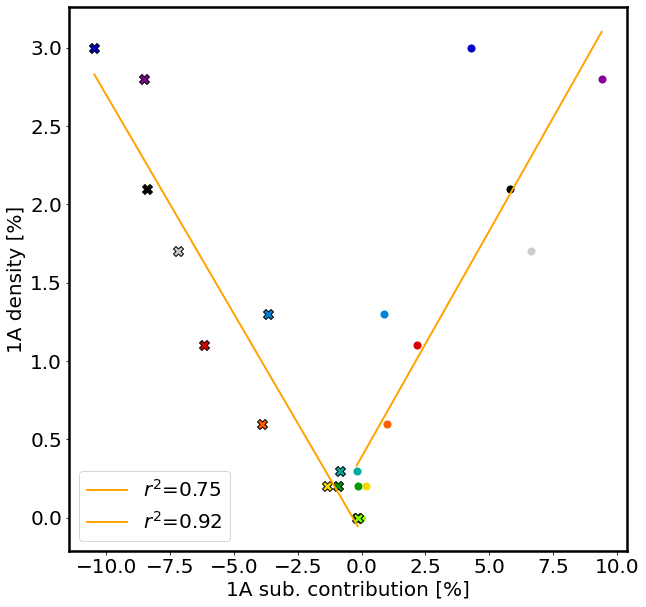

In [19]:
fig = plt.figure(figsize=(10,10))

ax5 = fig.add_subplot()

index_mld=8
PER_AC_MLD = np.array(PER_AC)[:,index_mld]
PER_C_MLD = np.array(PER_C)[:,index_mld]
HF_C_MLD = np.array(HF_C)[:,index_mld]
HF_AC_MLD = np.array(HF_AC)[:,index_mld]

for i in range(len(colors_month)):
    ax5.scatter(PER_AC_MLD[i],H_ac_tot_list[i],s=50,color=colors_month[i])

coefficients,residuals,rank,singular_values,rcond = np.polyfit(PER_AC_MLD,H_ac_tot_list, 1, rcond=None, full=True, w=None, cov=False)
regress_coef = 1 - residuals/(np.sum((H_ac_tot_list - np.mean(H_ac_tot_list))**2))
x = np.linspace(np.min(PER_AC_MLD),np.max(PER_AC_MLD))
y_pred = np.polyval(coefficients, x)

ax5.tick_params(axis='both',labelsize=20)    
#plt.text(0.2,0.2,'y = {0:.2f}x + {1:.2f} '.format(coefficients[0],coefficients[1]),color='orange',size=20)
#ax5.set_title('y = {0:.1f}x + {1:.1f} '.format(coefficients[0],coefficients[1]),color='orange',size=20)
ax5.plot(x, y_pred, color='orange', label='$r^2$={0:.2f}'.format(regress_coef[0]),linewidth=2)
ax5.legend()
#plt.xticks(size=20)
#plt.yticks(size=20)
#plt.ylabel("Front area [%]",size=20)
ax5.set_ylabel("1A density [%]",size=20)
ax5.set_xlabel("1A sub. contribution [%]",size=20)
#ax5.set_yticks(size=20)
ax5.legend(prop={'size': 20})
ax5.grid()

index_mld=12  
PER_AC_MLD = np.array(PER_AC)[:,index_mld]
PER_C_MLD = np.array(PER_C)[:,index_mld]
HF_C_MLD = np.array(HF_C)[:,index_mld]
HF_AC_MLD = np.array(HF_AC)[:,index_mld]

for i in range(len(colors_month)):
    ax5.scatter(PER_AC_MLD[i],H_ac_tot_list[i],s=100,color=colors_month[i],marker = 'X',edgecolor = "black",linewidth = 1)

coefficients,residuals,rank,singular_values,rcond = np.polyfit(PER_AC_MLD,H_ac_tot_list, 1, rcond=None, full=True, w=None, cov=False)
regress_coef = 1 - residuals/(np.sum((H_ac_tot_list - np.mean(H_ac_tot_list))**2))
x = np.linspace(np.min(PER_AC_MLD),np.max(PER_AC_MLD))
y_pred = np.polyval(coefficients, x)

ax5.tick_params(axis='both',labelsize=20)    
#plt.text(0.2,0.2,'y = {0:.2f}x + {1:.2f} '.format(coefficients[0],coefficients[1]),color='orange',size=20)
#ax5.set_title('y = {0:.1f}x + {1:.1f} '.format(coefficients[0],coefficients[1]),color='orange',size=20)
ax5.plot(x, y_pred, color='orange', label='$r^2$={0:.2f}'.format(regress_coef[0]),linewidth=2)
ax5.legend()
#plt.xticks(size=20)
#plt.yticks(size=20)
#plt.ylabel("Front area [%]",size=20)
ax5.set_ylabel("1A density [%]",size=20)
ax5.set_xlabel("1A sub. contribution [%]",size=20)
#ax5.set_yticks(size=20)
ax5.legend(prop={'size': 20})
ax5.grid()


# 5 derniers jours

In [54]:

month = 'feb'
list_month = ['jan','feb', 'mar', 'apr', 'may', 'jun','jul','aug','sep','oct','nov','dec']


HF_C = []
PER_C = []
HF_AC = []
PER_AC = []
TOT_NEG_WC = []
H_f_c_list = []
H_f_ac_list = []
H_f_tot_list = []
for month in list_month:

    print(month)

    nc = nc4.Dataset('/home2/datawork/tpicard/M2_intership/RREX2008_FT_3h/JPDF_filtred_domain/JPDF_{0}_mld.nc'.format(month),'r')
    H_wc = np.asfortranarray(nc.variables['H_wc'])[:,:,:,-5*8:]
    gap_list = np.asfortranarray(nc.variables['gap_list'])[:]
    H = np.asfortranarray(nc.variables['H_jpdf'])[:,:,:,-5*8:]
    
    xedges = np.arange(-6,6.05,0.05)
    yedges = np.arange(0,6.025,0.025)
    xx, yy = np.meshgrid(xedges[1:], yedges[1:])

    per_sf_wc_c = []
    per_sf_wc_ac = []
    
    tot_flu_wc_c= []
    tot_flu_wc_ac= []
    
    tot_neg_wc = []
    
    H_sum = np.nansum(H[:,:,0,:],axis=2)
    H_sum_norm = H_sum/np.sum(H_sum)
    H_f = np.where(xx > 0.5, H_sum,0)
    H_f = np.where(yy > xx, H_f,0)
    H_f_ac = np.where(xx < -0.5, H_sum,0)
    H_f_ac = np.where(yy > -xx, H_f_ac,0)
    H_f_c_list.append(np.round(np.nansum(H_f)*100/np.nansum(H_sum),decimals=1))
    H_f_ac_list.append(np.round(np.nansum(H_f_ac)*100/np.nansum(H_sum),decimals=1))
    H_f_tot_list.append(np.round(np.nansum(H_f_ac+H_f)*100/np.nansum(H_sum),decimals=1))
    
    for i in range(gap_list.shape[0]):

        H_wc_sum = np.nansum(H_wc[:,:,i,:],axis=2)

        H_wc_neg = np.where(H_wc_sum<0,H_wc_sum,0) # Flux de subduction
        
        H_f_wc_c = np.where(xx > 0.5, H_wc_sum,0)
        H_f_wc_c = np.where(yy > xx, H_f_wc_c,0)

        H_f_wc_ac = np.where(xx < -0.5, H_wc_sum,0)
        H_f_wc_ac = np.where(yy > -xx, H_f_wc_ac,0)

        H_f_wc_per_c = np.sum(H_f_wc_c)*100/np.sum(H_wc_neg)
        H_f_wc_per_ac = np.sum(H_f_wc_ac)*100/np.sum(H_wc_neg)

        per_sf_wc_c.append(H_f_wc_per_c)
        per_sf_wc_ac.append(H_f_wc_per_ac)
        
        tot_flu_wc_c.append(np.nansum(H_f_wc_c))
        tot_flu_wc_ac.append(np.nansum(H_f_wc_ac))
        
        tot_neg_wc.append(np.sum(H_wc_neg))
        
    HF_C.append(tot_flu_wc_c)
    HF_AC.append(tot_flu_wc_ac)    
    PER_C.append(per_sf_wc_c)   
    PER_AC.append(per_sf_wc_ac)
    TOT_NEG_WC.append(tot_neg_wc)

H_c_tot_list = H_f_c_list
H_ac_tot_list = H_f_ac_list

jan
feb
mar
apr
may
jun
jul
aug
sep
oct
nov
dec


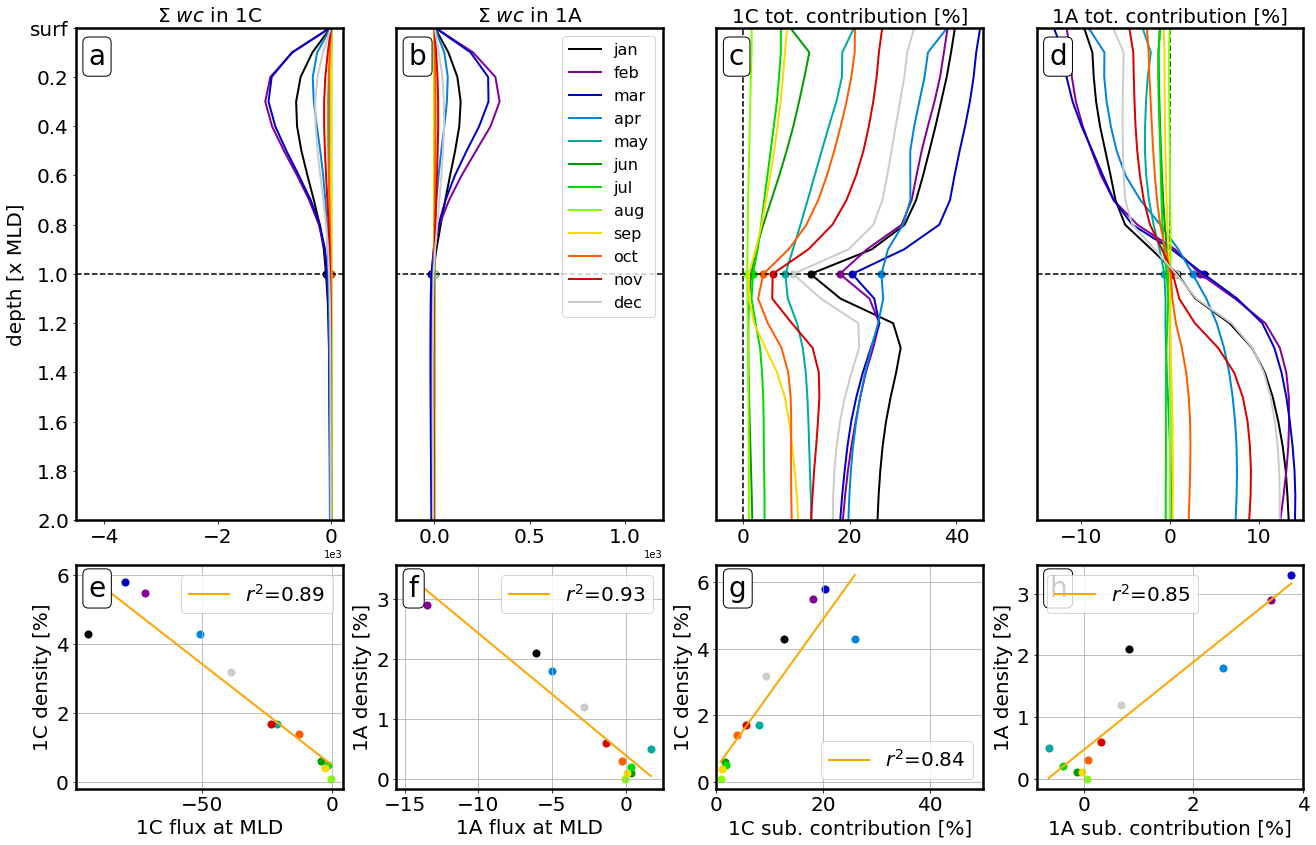

In [53]:
import matplotlib.transforms as mtransforms
from matplotlib.gridspec import GridSpec

index_mld = 10

title_jpdf = []
for gap in gap_list[:-1]:
    title_jpdf.append('{:.2}'.format(1-gap))
    
title_jpdf.append('surf')

fig = plt.figure(figsize=(22,14))

gs = GridSpec(3, 4, figure=fig)
ax2 = fig.add_subplot(gs[:2, 0])
ax1 = fig.add_subplot(gs[:2, 1])
ax4 = fig.add_subplot(gs[:2, 2])
ax3 = fig.add_subplot(gs[:2, 3])
ax8 = fig.add_subplot(gs[2, 0])
ax6 = fig.add_subplot(gs[2, 1])
ax7 = fig.add_subplot(gs[2, 2])
ax5 = fig.add_subplot(gs[2, 3])

label = 'b'
trans = mtransforms.ScaledTranslation(10/72, -5/72, fig.dpi_scale_trans)
ax1.text(0.01, 0.98, label, transform=ax1.transAxes + trans,
        fontsize=28, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='white', alpha=1, pad=0.2))

for i in range(0,len(HF_AC)):
    ax1.plot(HF_AC[i],gap_list,label=list_month[i],linewidth=2,color=colors_month[i])
    
for i in range(0,len(HF_C)):
    ax1.scatter(HF_AC[i][index_mld],gap_list[index_mld],s=50,color=colors_month[i])

ax1.hlines(gap_list[index_mld],-500,1500,linestyle='--',color='k')
ax1.set_xlim(-200,1200)


#ax1.set_xticks(size=20,rotation=0)
ax1.tick_params(axis='both',labelsize=20)    
ax1.ticklabel_format(style='sci', axis='x',scilimits=(0,0))
ax1.legend(prop={'size': 16})
ax1.vlines(0,gap_list[0],gap_list[-1],linestyles='--',colors='k')
ax1.set_ylim(gap_list[0],gap_list[-1])
ax1.set_title(r'$\Sigma$ $wc$ in 1A',size=20)
ax1.set_yticks([])

label = 'a'
trans = mtransforms.ScaledTranslation(10/72, -5/72, fig.dpi_scale_trans)
ax2.text(0.01, 0.98, label, transform=ax2.transAxes + trans,
        fontsize=28, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='white', alpha=1, pad=0.2))

for i in range(0,len(HF_C)):
    ax2.plot(HF_C[i],gap_list,label=list_month[i],linewidth=2,color=colors_month[i])

for i in range(0,len(HF_C)):
    ax2.scatter(HF_C[i][index_mld],gap_list[index_mld],s=50,color=colors_month[i])

ax2.hlines(gap_list[index_mld],-4500,500,linestyle='--',color='k')
ax2.set_xlim(-4500,200)

ax2.tick_params(axis='both',labelsize=20)    
ax2.ticklabel_format(style='sci', axis='x',scilimits=(0,0))
ax2.vlines(0,gap_list[0],gap_list[-1],linestyles='--',colors='k')
ax2.set_ylim(gap_list[0],gap_list[-1])
ax2.set_title(r'$\Sigma$ $wc$ in 1C',size=20)
ax2.set_ylabel('depth [x MLD]',size=20)

ax2.set_yticks(gap_list[::2])
ax2.set_yticklabels(title_jpdf[::2])

label = 'd'
trans = mtransforms.ScaledTranslation(10/72, -5/72, fig.dpi_scale_trans)
ax3.text(0.01, 0.98, label, transform=ax3.transAxes + trans,
        fontsize=28, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='white', alpha=1, pad=0.2))

for i in range(0,len(PER_AC)):
    ax3.plot(PER_AC[i],gap_list,label=list_month[i],linewidth=2,color=colors_month[i])

for i in range(0,len(HF_C)):
    ax3.scatter(PER_AC[i][index_mld],gap_list[index_mld],s=50,color=colors_month[i])

ax3.hlines(gap_list[index_mld],-15,15,linestyle='--',color='k')
ax3.set_xlim(-15,15)

#ax3.xticks(size=20)
ax3.tick_params(axis='both',labelsize=20)    
ax3.set_yticks([])
ax3.vlines(0,gap_list[0],gap_list[-1],linestyles='--',colors='k')
ax3.set_ylim(gap_list[0],gap_list[-1])
ax3.set_title("1A tot. contribution [%]",size=20)

label = 'c'
trans = mtransforms.ScaledTranslation(10/72, -5/72, fig.dpi_scale_trans)
ax4.text(0.01, 0.98, label, transform=ax4.transAxes + trans,
        fontsize=28, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='white', alpha=1, pad=0.2))

for i in range(0,len(PER_C)):
    ax4.plot(PER_C[i],gap_list,label=list_month[i],linewidth=2,color=colors_month[i])

for i in range(0,len(HF_C)):
    ax4.scatter(PER_C[i][index_mld],gap_list[index_mld],s=50,color=colors_month[i])

ax4.hlines(gap_list[index_mld],-5,45,linestyle='--',color='k')
ax4.set_xlim(-5,45)

ax4.tick_params(axis='both',labelsize=20)            
ax4.set_yticks([])
#ax4.xticks(size=20)
ax4.vlines(0,gap_list[0],gap_list[-1],linestyles='--',colors='k')
ax4.set_ylim(gap_list[0],gap_list[-1])
ax4.set_title("1C tot. contribution [%]",size=20)


PER_AC_MLD = np.array(PER_AC)[:,index_mld]
PER_C_MLD = np.array(PER_C)[:,index_mld]
HF_C_MLD = np.array(HF_C)[:,index_mld]
HF_AC_MLD = np.array(HF_AC)[:,index_mld]


label = 'h'
trans = mtransforms.ScaledTranslation(10/72, -5/72, fig.dpi_scale_trans)
ax5.text(0.01, 0.98, label, transform=ax5.transAxes + trans,
        fontsize=28, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='white', alpha=1, pad=0.2))

for i in range(len(colors_month)):
    ax5.scatter(PER_AC_MLD[i],H_ac_tot_list[i],s=50,color=colors_month[i])

coefficients,residuals,rank,singular_values,rcond = np.polyfit(PER_AC_MLD,H_ac_tot_list, 1, rcond=None, full=True, w=None, cov=False)
regress_coef = 1 - residuals/(np.sum((H_ac_tot_list - np.mean(H_ac_tot_list))**2))
x = np.linspace(np.min(PER_AC_MLD),np.max(PER_AC_MLD))
y_pred = np.polyval(coefficients, x)

ax5.tick_params(axis='both',labelsize=20)    
#plt.text(0.2,0.2,'y = {0:.2f}x + {1:.2f} '.format(coefficients[0],coefficients[1]),color='orange',size=20)
#ax5.set_title('y = {0:.1f}x + {1:.1f} '.format(coefficients[0],coefficients[1]),color='orange',size=20)
ax5.plot(x, y_pred, color='orange', label='$r^2$={0:.2f}'.format(regress_coef[0]),linewidth=2)
ax5.legend()
#plt.xticks(size=20)
#plt.yticks(size=20)
#plt.ylabel("Front area [%]",size=20)
ax5.set_ylabel("1A density [%]",size=20)
ax5.set_xlabel("1A sub. contribution [%]",size=20)
#ax5.set_yticks(size=20)
ax5.legend(prop={'size': 20})
ax5.grid()


label = 'f'
trans = mtransforms.ScaledTranslation(10/72, -5/72, fig.dpi_scale_trans)
ax6.text(0.01, 0.98, label, transform=ax6.transAxes + trans,
        fontsize=28, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='white', alpha=1, pad=0.2))

for i in range(len(colors_month)):
    ax6.scatter(HF_AC_MLD[i],H_ac_tot_list[i],s=50,color=colors_month[i])
coefficients,residuals,rank,singular_values,rcond = np.polyfit(HF_AC_MLD,H_ac_tot_list, 1, rcond=None, full=True, w=None, cov=False)
regress_coef = 1 - residuals/(np.sum((H_ac_tot_list - np.mean(H_ac_tot_list))**2))

x = np.linspace(np.min(HF_AC_MLD),np.max(HF_AC_MLD))
y_pred = np.polyval(coefficients, x)

ax6.tick_params(axis='both',labelsize=20)    
#plt.text(0.2,0.2,'y = {0:.2f}x + {1:.2f} '.format(coefficients[0,0],coefficients[1,0]),color='orange',size=20)
ax6.plot(x, y_pred, color='orange', label='$r^2$={0:.2f}'.format(regress_coef[0]),linewidth=2)
#ax6.set_title('y = {0:.1f}x + {1:.1f} '.format(coefficients[0],coefficients[1]),color='orange',size=20)
ax6.legend()
#ax6.xticks(size=20)
#ax6.yticks(size=20)
ax6.set_ylabel("1A density [%]",size=20)
ax6.set_xlabel("1A flux at MLD",size=20)
ax6.legend(prop={'size': 20})
ax6.grid()
#plt.xlim(0,50)

label = 'g'
trans = mtransforms.ScaledTranslation(10/72, -5/72, fig.dpi_scale_trans)
ax7.text(0.01, 0.98, label, transform=ax7.transAxes + trans,
        fontsize=28, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='white', alpha=1, pad=0.2))

for i in range(len(colors_month)):
    ax7.scatter(PER_C_MLD[i],H_c_tot_list[i],s=50,color=colors_month[i])
    
coefficients,residuals,rank,singular_values,rcond = np.polyfit(PER_C_MLD,H_c_tot_list, 1, rcond=None, full=True, w=None, cov=False)
regress_coef = 1 - residuals/(np.sum((H_c_tot_list - np.mean(H_c_tot_list))**2))
x = np.linspace(np.min(PER_C_MLD),np.max(PER_C_MLD))
y_pred = np.polyval(coefficients, x)

ax7.tick_params(axis='both',labelsize=20)    
ax7.set_ylabel("1C density [%]",size=20)
#plt.text(0.2,0.2,'y = {0:.2f}x + {1:.2f} '.format(coefficients[0,0],coefficients[1,0]),color='orange',size=20)
ax7.plot(x, y_pred, color='orange', label='$r^2$={0:.2f}'.format(regress_coef[0]),linewidth=2)
#ax7.set_title('y = {0:.1f}x + {1:.1f} '.format(coefficients[0],coefficients[1]),color='orange',size=20)
ax7.legend()
#ax7.xticks(size=20)
#ax7.yticks(size=20)
#plt.ylabel("Front area [%]",size=20)
ax7.set_xlabel("1C sub. contribution [%]",size=20)
ax7.legend(prop={'size': 20},loc=4)
ax7.grid()
ax7.set_xlim(0,50)

label = 'e'
trans = mtransforms.ScaledTranslation(10/72, -5/72, fig.dpi_scale_trans)
ax8.text(0.01, 0.98, label, transform=ax8.transAxes + trans,
        fontsize=28, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='white', alpha=1, pad=0.2))


for i in range(len(colors_month)):
    ax8.scatter(HF_C_MLD[i],H_c_tot_list[i],s=50,color=colors_month[i])

coefficients,residuals,rank,singular_values,rcond = np.polyfit(HF_C_MLD,H_c_tot_list, 1, rcond=None, full=True, w=None, cov=False)
regress_coef = 1 - residuals/(np.sum((H_c_tot_list - np.mean(H_c_tot_list))**2))
x = np.linspace(np.min(HF_C_MLD),np.max(HF_C_MLD)) 
y_pred = np.polyval(coefficients, x)

ax8.tick_params(axis='both',labelsize=20)    
#plt.text(0.2,0.2,'y = {0:.2f}x + {1:.2f} '.format(coefficients[0,0],coefficients[1,0]),color='orange',size=20)
ax8.plot(x, y_pred, color='orange', label='$r^2$={0:.2f}'.format(regress_coef[0]),linewidth=2)
#ax8.set_title('y = {0:.2f}x + {1:.1f} '.format(coefficients[0],coefficients[1]),color='orange',size=20)
ax8.legend()
ax8.set_ylabel("1C density [%]",size=20)
#ax5.xticks(size=20)
#ax5.yticks(size=20)
#plt.ylabel("Front area [%]",size=20)
ax8.set_xlabel("1C flux at MLD",size=20)
ax8.legend(prop={'size': 20})
ax8.grid()


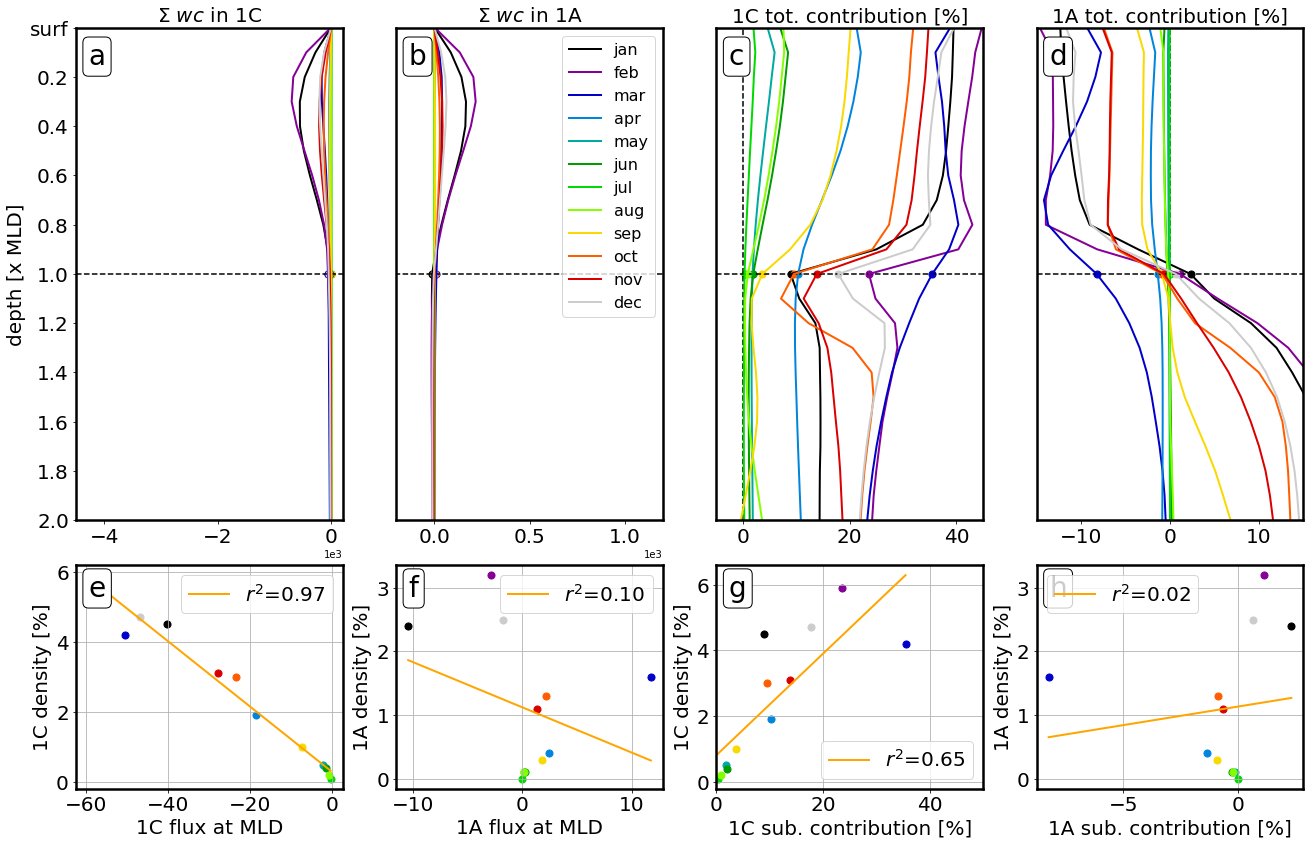

In [56]:
import matplotlib.transforms as mtransforms
from matplotlib.gridspec import GridSpec

index_mld = 10

title_jpdf = []
for gap in gap_list[:-1]:
    title_jpdf.append('{:.2}'.format(1-gap))
    
title_jpdf.append('surf')

fig = plt.figure(figsize=(22,14))

gs = GridSpec(3, 4, figure=fig)
ax2 = fig.add_subplot(gs[:2, 0])
ax1 = fig.add_subplot(gs[:2, 1])
ax4 = fig.add_subplot(gs[:2, 2])
ax3 = fig.add_subplot(gs[:2, 3])
ax8 = fig.add_subplot(gs[2, 0])
ax6 = fig.add_subplot(gs[2, 1])
ax7 = fig.add_subplot(gs[2, 2])
ax5 = fig.add_subplot(gs[2, 3])

label = 'b'
trans = mtransforms.ScaledTranslation(10/72, -5/72, fig.dpi_scale_trans)
ax1.text(0.01, 0.98, label, transform=ax1.transAxes + trans,
        fontsize=28, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='white', alpha=1, pad=0.2))

for i in range(0,len(HF_AC)):
    ax1.plot(HF_AC[i],gap_list,label=list_month[i],linewidth=2,color=colors_month[i])
    
for i in range(0,len(HF_C)):
    ax1.scatter(HF_AC[i][index_mld],gap_list[index_mld],s=50,color=colors_month[i])

ax1.hlines(gap_list[index_mld],-500,1500,linestyle='--',color='k')
ax1.set_xlim(-200,1200)


#ax1.set_xticks(size=20,rotation=0)
ax1.tick_params(axis='both',labelsize=20)    
ax1.ticklabel_format(style='sci', axis='x',scilimits=(0,0))
ax1.legend(prop={'size': 16})
ax1.vlines(0,gap_list[0],gap_list[-1],linestyles='--',colors='k')
ax1.set_ylim(gap_list[0],gap_list[-1])
ax1.set_title(r'$\Sigma$ $wc$ in 1A',size=20)
ax1.set_yticks([])

label = 'a'
trans = mtransforms.ScaledTranslation(10/72, -5/72, fig.dpi_scale_trans)
ax2.text(0.01, 0.98, label, transform=ax2.transAxes + trans,
        fontsize=28, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='white', alpha=1, pad=0.2))

for i in range(0,len(HF_C)):
    ax2.plot(HF_C[i],gap_list,label=list_month[i],linewidth=2,color=colors_month[i])

for i in range(0,len(HF_C)):
    ax2.scatter(HF_C[i][index_mld],gap_list[index_mld],s=50,color=colors_month[i])

ax2.hlines(gap_list[index_mld],-4500,500,linestyle='--',color='k')
ax2.set_xlim(-4500,200)

ax2.tick_params(axis='both',labelsize=20)    
ax2.ticklabel_format(style='sci', axis='x',scilimits=(0,0))
ax2.vlines(0,gap_list[0],gap_list[-1],linestyles='--',colors='k')
ax2.set_ylim(gap_list[0],gap_list[-1])
ax2.set_title(r'$\Sigma$ $wc$ in 1C',size=20)
ax2.set_ylabel('depth [x MLD]',size=20)

ax2.set_yticks(gap_list[::2])
ax2.set_yticklabels(title_jpdf[::2])

label = 'd'
trans = mtransforms.ScaledTranslation(10/72, -5/72, fig.dpi_scale_trans)
ax3.text(0.01, 0.98, label, transform=ax3.transAxes + trans,
        fontsize=28, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='white', alpha=1, pad=0.2))

for i in range(0,len(PER_AC)):
    ax3.plot(PER_AC[i],gap_list,label=list_month[i],linewidth=2,color=colors_month[i])

for i in range(0,len(HF_C)):
    ax3.scatter(PER_AC[i][index_mld],gap_list[index_mld],s=50,color=colors_month[i])

ax3.hlines(gap_list[index_mld],-15,15,linestyle='--',color='k')
ax3.set_xlim(-15,15)

#ax3.xticks(size=20)
ax3.tick_params(axis='both',labelsize=20)    
ax3.set_yticks([])
ax3.vlines(0,gap_list[0],gap_list[-1],linestyles='--',colors='k')
ax3.set_ylim(gap_list[0],gap_list[-1])
ax3.set_title("1A tot. contribution [%]",size=20)

label = 'c'
trans = mtransforms.ScaledTranslation(10/72, -5/72, fig.dpi_scale_trans)
ax4.text(0.01, 0.98, label, transform=ax4.transAxes + trans,
        fontsize=28, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='white', alpha=1, pad=0.2))

for i in range(0,len(PER_C)):
    ax4.plot(PER_C[i],gap_list,label=list_month[i],linewidth=2,color=colors_month[i])

for i in range(0,len(HF_C)):
    ax4.scatter(PER_C[i][index_mld],gap_list[index_mld],s=50,color=colors_month[i])

ax4.hlines(gap_list[index_mld],-5,45,linestyle='--',color='k')
ax4.set_xlim(-5,45)

ax4.tick_params(axis='both',labelsize=20)            
ax4.set_yticks([])
#ax4.xticks(size=20)
ax4.vlines(0,gap_list[0],gap_list[-1],linestyles='--',colors='k')
ax4.set_ylim(gap_list[0],gap_list[-1])
ax4.set_title("1C tot. contribution [%]",size=20)


PER_AC_MLD = np.array(PER_AC)[:,index_mld]
PER_C_MLD = np.array(PER_C)[:,index_mld]
HF_C_MLD = np.array(HF_C)[:,index_mld]
HF_AC_MLD = np.array(HF_AC)[:,index_mld]


label = 'h'
trans = mtransforms.ScaledTranslation(10/72, -5/72, fig.dpi_scale_trans)
ax5.text(0.01, 0.98, label, transform=ax5.transAxes + trans,
        fontsize=28, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='white', alpha=1, pad=0.2))

for i in range(len(colors_month)):
    ax5.scatter(PER_AC_MLD[i],H_ac_tot_list[i],s=50,color=colors_month[i])

coefficients,residuals,rank,singular_values,rcond = np.polyfit(PER_AC_MLD,H_ac_tot_list, 1, rcond=None, full=True, w=None, cov=False)
regress_coef = 1 - residuals/(np.sum((H_ac_tot_list - np.mean(H_ac_tot_list))**2))
x = np.linspace(np.min(PER_AC_MLD),np.max(PER_AC_MLD))
y_pred = np.polyval(coefficients, x)

ax5.tick_params(axis='both',labelsize=20)    
#plt.text(0.2,0.2,'y = {0:.2f}x + {1:.2f} '.format(coefficients[0],coefficients[1]),color='orange',size=20)
#ax5.set_title('y = {0:.1f}x + {1:.1f} '.format(coefficients[0],coefficients[1]),color='orange',size=20)
ax5.plot(x, y_pred, color='orange', label='$r^2$={0:.2f}'.format(regress_coef[0]),linewidth=2)
ax5.legend()
#plt.xticks(size=20)
#plt.yticks(size=20)
#plt.ylabel("Front area [%]",size=20)
ax5.set_ylabel("1A density [%]",size=20)
ax5.set_xlabel("1A sub. contribution [%]",size=20)
#ax5.set_yticks(size=20)
ax5.legend(prop={'size': 20})
ax5.grid()


label = 'f'
trans = mtransforms.ScaledTranslation(10/72, -5/72, fig.dpi_scale_trans)
ax6.text(0.01, 0.98, label, transform=ax6.transAxes + trans,
        fontsize=28, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='white', alpha=1, pad=0.2))

for i in range(len(colors_month)):
    ax6.scatter(HF_AC_MLD[i],H_ac_tot_list[i],s=50,color=colors_month[i])
coefficients,residuals,rank,singular_values,rcond = np.polyfit(HF_AC_MLD,H_ac_tot_list, 1, rcond=None, full=True, w=None, cov=False)
regress_coef = 1 - residuals/(np.sum((H_ac_tot_list - np.mean(H_ac_tot_list))**2))

x = np.linspace(np.min(HF_AC_MLD),np.max(HF_AC_MLD))
y_pred = np.polyval(coefficients, x)

ax6.tick_params(axis='both',labelsize=20)    
#plt.text(0.2,0.2,'y = {0:.2f}x + {1:.2f} '.format(coefficients[0,0],coefficients[1,0]),color='orange',size=20)
ax6.plot(x, y_pred, color='orange', label='$r^2$={0:.2f}'.format(regress_coef[0]),linewidth=2)
#ax6.set_title('y = {0:.1f}x + {1:.1f} '.format(coefficients[0],coefficients[1]),color='orange',size=20)
ax6.legend()
#ax6.xticks(size=20)
#ax6.yticks(size=20)
ax6.set_ylabel("1A density [%]",size=20)
ax6.set_xlabel("1A flux at MLD",size=20)
ax6.legend(prop={'size': 20})
ax6.grid()
#plt.xlim(0,50)

label = 'g'
trans = mtransforms.ScaledTranslation(10/72, -5/72, fig.dpi_scale_trans)
ax7.text(0.01, 0.98, label, transform=ax7.transAxes + trans,
        fontsize=28, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='white', alpha=1, pad=0.2))

for i in range(len(colors_month)):
    ax7.scatter(PER_C_MLD[i],H_c_tot_list[i],s=50,color=colors_month[i])
    
coefficients,residuals,rank,singular_values,rcond = np.polyfit(PER_C_MLD,H_c_tot_list, 1, rcond=None, full=True, w=None, cov=False)
regress_coef = 1 - residuals/(np.sum((H_c_tot_list - np.mean(H_c_tot_list))**2))
x = np.linspace(np.min(PER_C_MLD),np.max(PER_C_MLD))
y_pred = np.polyval(coefficients, x)

ax7.tick_params(axis='both',labelsize=20)    
ax7.set_ylabel("1C density [%]",size=20)
#plt.text(0.2,0.2,'y = {0:.2f}x + {1:.2f} '.format(coefficients[0,0],coefficients[1,0]),color='orange',size=20)
ax7.plot(x, y_pred, color='orange', label='$r^2$={0:.2f}'.format(regress_coef[0]),linewidth=2)
#ax7.set_title('y = {0:.1f}x + {1:.1f} '.format(coefficients[0],coefficients[1]),color='orange',size=20)
ax7.legend()
#ax7.xticks(size=20)
#ax7.yticks(size=20)
#plt.ylabel("Front area [%]",size=20)
ax7.set_xlabel("1C sub. contribution [%]",size=20)
ax7.legend(prop={'size': 20},loc=4)
ax7.grid()
ax7.set_xlim(0,50)

label = 'e'
trans = mtransforms.ScaledTranslation(10/72, -5/72, fig.dpi_scale_trans)
ax8.text(0.01, 0.98, label, transform=ax8.transAxes + trans,
        fontsize=28, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='white', alpha=1, pad=0.2))


for i in range(len(colors_month)):
    ax8.scatter(HF_C_MLD[i],H_c_tot_list[i],s=50,color=colors_month[i])

coefficients,residuals,rank,singular_values,rcond = np.polyfit(HF_C_MLD,H_c_tot_list, 1, rcond=None, full=True, w=None, cov=False)
regress_coef = 1 - residuals/(np.sum((H_c_tot_list - np.mean(H_c_tot_list))**2))
x = np.linspace(np.min(HF_C_MLD),np.max(HF_C_MLD)) 
y_pred = np.polyval(coefficients, x)

ax8.tick_params(axis='both',labelsize=20)    
#plt.text(0.2,0.2,'y = {0:.2f}x + {1:.2f} '.format(coefficients[0,0],coefficients[1,0]),color='orange',size=20)
ax8.plot(x, y_pred, color='orange', label='$r^2$={0:.2f}'.format(regress_coef[0]),linewidth=2)
#ax8.set_title('y = {0:.2f}x + {1:.1f} '.format(coefficients[0],coefficients[1]),color='orange',size=20)
ax8.legend()
ax8.set_ylabel("1C density [%]",size=20)
#ax5.xticks(size=20)
#ax5.yticks(size=20)
#plt.ylabel("Front area [%]",size=20)
ax8.set_xlabel("1C flux at MLD",size=20)
ax8.legend(prop={'size': 20})
ax8.grid()



In [2]:
H_f_c_list=[]
H_f_ac_list=[]
H_f_tot_list =[]

#PER_MLD = []

#PER_MLD_POS = []
#PER_MLD_NEG = []

#list_month = ['feb', 'feb', 'mar', 'apr','may','jun','jul','aug','sep','oct','nov','dec']

xedges = np.arange(-6,6.05,0.05)
yedges = np.arange(0,6.025,0.025)
xx, yy = np.meshgrid(xedges[1:], yedges[1:])

for i in range(0,len(list_month)):
        
    month=list_month[i]
    
    nc = nc4.Dataset('/home2/datawork/tpicard/M2_intership/RREX2008_FT_3h/JPDF_filtred_domain/JPDF_{0}_mld.nc'.format(month),'r')
    H = np.asfortranarray(nc.variables['H_jpdf'])[:,:,:,:]
    #H_wc = np.asfortranarray(nc.variables['H_wc'])[:,:,:,:]
    gap_list = np.asfortranarray(nc.variables['gap_list'])[:]
    nc.close()
    
    H_sum = np.nansum(H[:,:,0,:],axis=2)
    H_sum_norm = H_sum/np.sum(H_sum)
    H_f = np.where(xx > 0.5, H_sum,0)
    H_f = np.where(yy > xx, H_f,0)
    H_f_ac = np.where(xx < -0.5, H_sum,0)
    H_f_ac = np.where(yy > -xx, H_f_ac,0)
    H_f_c_list.append(np.round(np.nansum(H_f)*100/np.nansum(H_sum),decimals=1))
    H_f_ac_list.append(np.round(np.nansum(H_f_ac)*100/np.nansum(H_sum),decimals=1))
    H_f_tot_list.append(np.round(np.nansum(H_f_ac+H_f)*100/np.nansum(H_sum),decimals=1))
    
    #PER_MLD_POS.append(PER_pos[i][10])
    #PER_MLD_NEG.append(PER_neg[i][10])

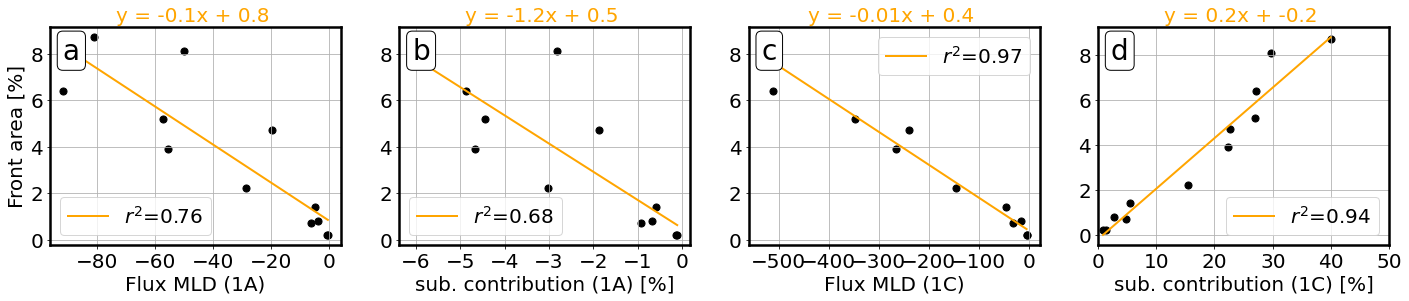

In [31]:
# with MLD 
import matplotlib.transforms as mtransforms

fig = plt.figure(figsize=(24,4))

PER_AC_MLD = np.array(PER_AC)[:,11]
PER_C_MLD = np.array(PER_C)[:,11]
HF_C_MLD = np.array(HF_C)[:,11]
HF_AC_MLD = np.array(HF_AC)[:,11]

ax = fig.add_subplot(1,4,2)

label = 'b'
trans = mtransforms.ScaledTranslation(10/72, -5/72, fig.dpi_scale_trans)
ax.text(0.01, 0.98, label, transform=ax.transAxes + trans,
        fontsize=28, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='white', alpha=1, pad=0.2))

plt.scatter(PER_AC_MLD,H_f_tot_list,s=50,c='k')
coefficients,residuals,rank,singular_values,rcond = np.polyfit(PER_AC_MLD,H_f_tot_list, 1, rcond=None, full=True, w=None, cov=False)
regress_coef = 1 - residuals/(np.sum((H_f_tot_list - np.mean(H_f_tot_list))**2))
x = np.linspace(np.min(PER_AC_MLD),np.max(PER_AC_MLD))
y_pred = np.polyval(coefficients, x)

#plt.text(0.2,0.2,'y = {0:.2f}x + {1:.2f} '.format(coefficients[0],coefficients[1]),color='orange',size=20)
plt.title('y = {0:.1f}x + {1:.1f} '.format(coefficients[0],coefficients[1]),color='orange',size=20)
plt.plot(x, y_pred, color='orange', label='$r^2$={0:.2f}'.format(regress_coef[0]),linewidth=2)
plt.legend()
plt.xticks(size=20)
plt.yticks(size=20)
#plt.ylabel("Front area [%]",size=20)
plt.xlabel("sub. contribution (1A) [%]",size=20)
plt.yticks(size=20)
plt.legend(prop={'size': 20})
plt.grid()
#plt.xlim(0,15)
#plt.ylim(0,10)

ax = fig.add_subplot(1,4,1)
label = 'a'
trans = mtransforms.ScaledTranslation(10/72, -5/72, fig.dpi_scale_trans)
ax.text(0.01, 0.98, label, transform=ax.transAxes + trans,
        fontsize=28, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='white', alpha=1, pad=0.2))

plt.scatter(HF_AC_MLD,H_f_tot_list,s=50,c='k')
coefficients,residuals,rank,singular_values,rcond = np.polyfit(HF_AC_MLD,H_f_tot_list, 1, rcond=None, full=True, w=None, cov=False)
regress_coef = 1 - residuals/(np.sum((H_f_tot_list - np.mean(H_f_tot_list))**2))
x = np.linspace(np.min(HF_AC_MLD),np.max(HF_AC_MLD))
y_pred = np.polyval(coefficients, x)

#plt.text(0.2,0.2,'y = {0:.2f}x + {1:.2f} '.format(coefficients[0,0],coefficients[1,0]),color='orange',size=20)
plt.plot(x, y_pred, color='orange', label='$r^2$={0:.2f}'.format(regress_coef[0]),linewidth=2)
plt.title('y = {0:.1f}x + {1:.1f} '.format(coefficients[0],coefficients[1]),color='orange',size=20)
plt.legend()
plt.xticks(size=20)
plt.yticks(size=20)
plt.ylabel("Front area [%]",size=20)
plt.xlabel("Flux MLD (1A)",size=20)
plt.yticks(size=20)
plt.legend(prop={'size': 20})
plt.grid()
#plt.xlim(0,50)

ax = fig.add_subplot(1,4,4)
label = 'd'
trans = mtransforms.ScaledTranslation(10/72, -5/72, fig.dpi_scale_trans)
ax.text(0.01, 0.98, label, transform=ax.transAxes + trans,
        fontsize=28, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='white', alpha=1, pad=0.2))

plt.scatter(PER_C_MLD,H_f_tot_list,s=50,c='k')
coefficients,residuals,rank,singular_values,rcond = np.polyfit(PER_C_MLD,H_f_tot_list, 1, rcond=None, full=True, w=None, cov=False)
regress_coef = 1 - residuals/(np.sum((H_f_tot_list - np.mean(H_f_tot_list))**2))
x = np.linspace(np.min(PER_C_MLD),np.max(PER_C_MLD))
y_pred = np.polyval(coefficients, x)

#plt.text(0.2,0.2,'y = {0:.2f}x + {1:.2f} '.format(coefficients[0,0],coefficients[1,0]),color='orange',size=20)
plt.plot(x, y_pred, color='orange', label='$r^2$={0:.2f}'.format(regress_coef[0]),linewidth=2)
plt.title('y = {0:.1f}x + {1:.1f} '.format(coefficients[0],coefficients[1]),color='orange',size=20)
plt.legend()
plt.xticks(size=20)
plt.yticks(size=20)
#plt.ylabel("Front area [%]",size=20)
plt.xlabel("sub. contribution (1C) [%]",size=20)
plt.yticks(size=20)
plt.legend(prop={'size': 20},loc=4)
plt.grid()
plt.xlim(0,50)

ax = fig.add_subplot(1,4,3)
label = 'c'
trans = mtransforms.ScaledTranslation(10/72, -5/72, fig.dpi_scale_trans)
ax.text(0.01, 0.98, label, transform=ax.transAxes + trans,
        fontsize=28, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='white', alpha=1, pad=0.2))

plt.scatter(HF_C_MLD,H_f_tot_list,s=50,c='k')
coefficients,residuals,rank,singular_values,rcond = np.polyfit(HF_C_MLD,H_f_tot_list, 1, rcond=None, full=True, w=None, cov=False)
regress_coef = 1 - residuals/(np.sum((H_f_tot_list - np.mean(H_f_tot_list))**2))
x = np.linspace(np.min(HF_C_MLD),np.max(HF_C_MLD))
y_pred = np.polyval(coefficients, x)

#plt.text(0.2,0.2,'y = {0:.2f}x + {1:.2f} '.format(coefficients[0,0],coefficients[1,0]),color='orange',size=20)
plt.plot(x, y_pred, color='orange', label='$r^2$={0:.2f}'.format(regress_coef[0]),linewidth=2)
plt.title('y = {0:.2f}x + {1:.1f} '.format(coefficients[0],coefficients[1]),color='orange',size=20)
plt.legend()
plt.xticks(size=20)
plt.yticks(size=20)
#plt.ylabel("Front area [%]",size=20)
plt.xlabel("Flux MLD (1C)",size=20)
plt.yticks(size=20)
plt.legend(prop={'size': 20})
plt.grid()
#plt.xlim(0,50)

plt.savefig(dir_save+'correlation_flux_mld.png',dpi=50)

In [21]:
1/0.24

4.166666666666667

(0.0, 1000.0)

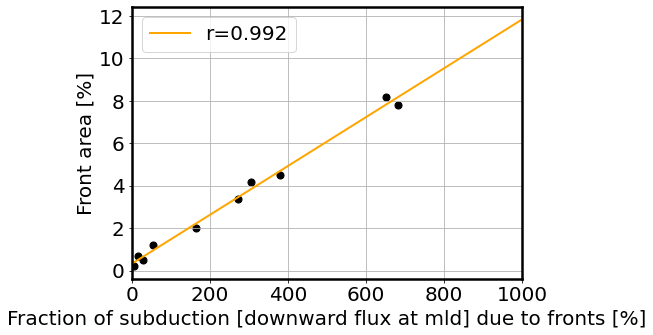

In [4]:
H_f_c_list=[]
H_f_ac_list=[]
H_f_tot_list =[]

HF_MLD = []

#list_month = ['feb', 'feb', 'mar', 'apr','may','jun','jul','aug','sep','oct','nov','dec']

xedges = np.arange(-6,6.05,0.05)
yedges = np.arange(0,6.025,0.025)
xx, yy = np.meshgrid(xedges[1:], yedges[1:])

for i in range(0,len(list_month)):
        
    month=list_month[i]
    
    nc = nc4.Dataset('/home2/datawork/tpicard/M2_intership/RREX2008_FT_3h/JPDF_{0}_mld.nc'.format(month),'r')
    H = np.asfortranarray(nc.variables['H_jpdf'])[:,:,:,:]
    H_wc = np.asfortranarray(nc.variables['H_wc'])[:,:,:,:]
    gap_list = np.asfortranarray(nc.variables['gap_list'])[:]
    nc.close()
    
    H_sum = np.nansum(H[:,:,0,:],axis=2)
    H_sum_norm = H_sum/np.sum(H_sum)
    H_f = np.where(xx > 0.5, H_sum,0)
    H_f = np.where(yy > xx, H_f,0)
    H_f_ac = np.where(xx < -0.5, H_sum,0)
    H_f_ac = np.where(yy > -xx, H_f_ac,0)
    H_f_c_list.append(np.round(np.nansum(H_f)*100/np.nansum(H_sum),decimals=1))
    H_f_ac_list.append(np.round(np.nansum(H_f_ac)*100/np.nansum(H_sum),decimals=1))
    H_f_tot_list.append(np.round(np.nansum(H_f_ac+H_f)*100/np.nansum(H_sum),decimals=1))
    HF_MLD.append(HF[i][10])



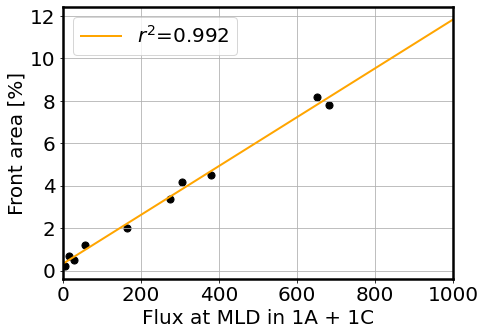

In [8]:
# with MLD 
plt.figure(figsize=(7,5))

plt.scatter(HF_MLD,H_f_tot_list,s=50,c='k')
coefficients,residuals,rank,singular_values,rcond = np.polyfit(HF_MLD,H_f_tot_list, 1, rcond=None, full=True, w=None, cov=False)
regress_coef = 1 - residuals/(np.sum((H_f_tot_list - np.mean(H_f_tot_list))**2))
x = np.linspace(0,1000)
y_pred = np.polyval(coefficients, x)

#plt.text(0.2,0.2,'y = {0:.2f}x + {1:.2f} '.format(coefficients[0,0],coefficients[1,0]),color='orange',size=20)
plt.plot(x, y_pred, color='orange', label='$r^2$={0:.3f}'.format(regress_coef[0]),linewidth=2)
plt.legend()
plt.xticks(size=20)
plt.yticks(size=20)
plt.ylabel("Front area [%]",size=20)
plt.xlabel("Flux at MLD in 1A + 1C",size=20)
plt.yticks(size=20)
plt.legend(prop={'size': 20})
plt.grid()
plt.xlim(0,1000)
plt.savefig(dir_save+'front_area_vs_subduction_flux.png',dpi=50)